## Read cleaned and vectorized data

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation  # Importing the animation module
import pickle


def read_pkl(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    return data

# Check the first video key in the cleaned data
cleaned_path = '/nas/Dataset/Phoenix/phoenix-2014-keypoints-diff-cleaned2.pkl'
cleaned_data = read_pkl(cleaned_path)
first_video_key = next(iter(cleaned_data))  # Get the first key directly from the dictionary
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access the keypoints

vectorized_path = '/nas/Dataset/Phoenix/discretized_data2.pkl'
vectorized_data = read_pkl(vectorized_path)
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Access the keypoints


## Visualize data


### Track only certain keypoint

No handles with labels found to put in legend.


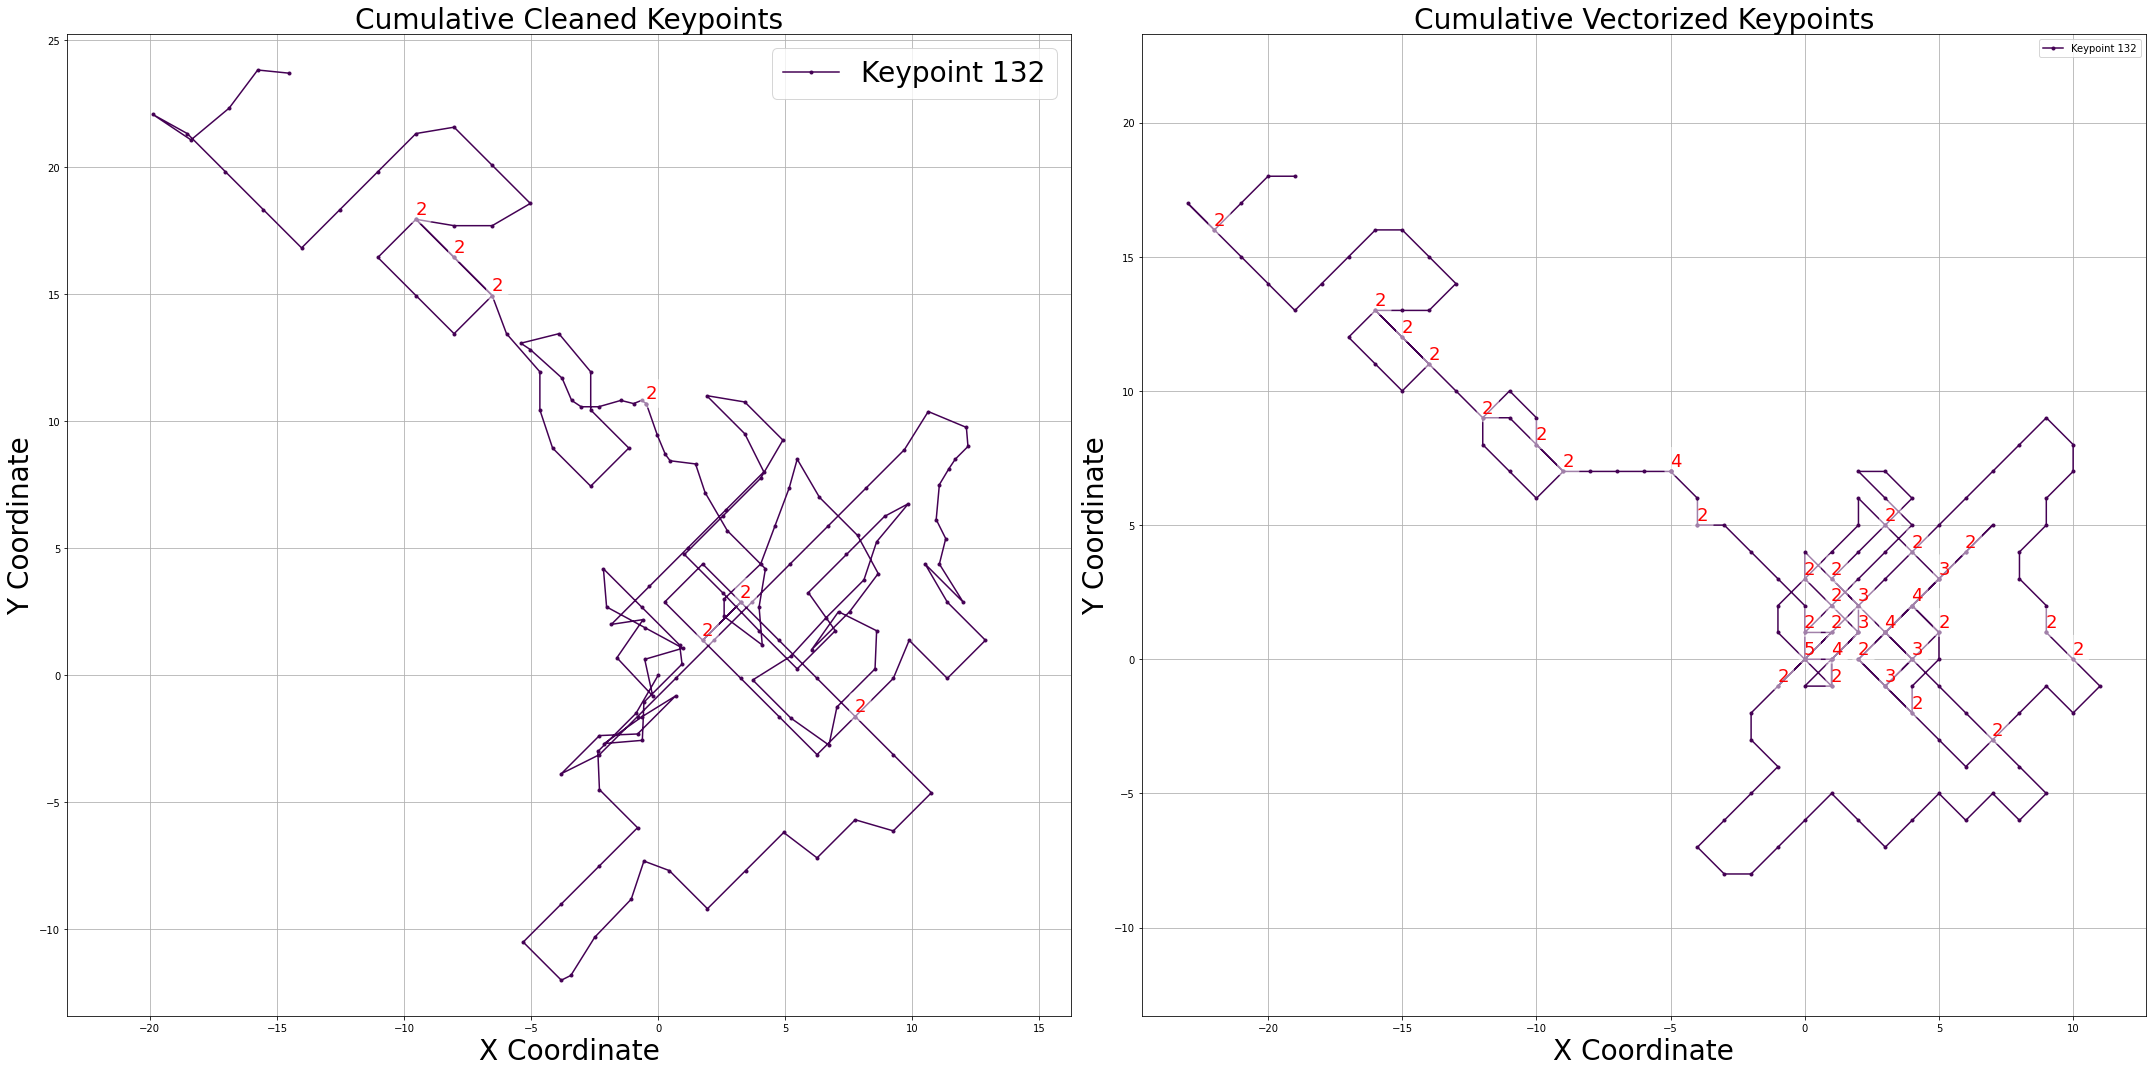

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Sample data for demonstration: Simulated keypoints for multiple frames
#num_frames = 10  # Total number of frames
num_keypoints = 133  # Total keypoints for each frame



# Access the keypoints from the cleaned and vectorized data
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access cleaned keypoints
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Access vectorized keypoints

# Specify the indices of the keypoints to track; for example, track keypoints 0
keypoints_to_track = [132]  # Replace with desired keypoint indices
num_keypoints_to_track = len(keypoints_to_track)

# Initialize cumulative sum arrays for cleaned and vectorized keypoints to track specific points
cumulative_sum_cleaned = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates
cumulative_sum_vectorized = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates

# Generate a colormap to assign unique colors for each keypoint
colors = plt.cm.viridis(np.linspace(0, 1, num_keypoints_to_track))  # Use a colormap for colors

# Initialize lists to record all trajectory points for plotting
all_trajectories_cleaned = [[] for _ in range(num_keypoints_to_track)]
all_trajectories_vectorized = [[] for _ in range(num_keypoints_to_track)]

# Iterate through each frame to calculate cumulative keypoints
for id in range(len(vectorized_keypoints)):
    # Extract the current frame's keypoints for cleaned and vectorized data
    current_cleaned = cleaned_keypoints[id]
    current_vectorized = vectorized_keypoints[id]

    # Select only the keypoints to track
    tracked_cleaned = current_cleaned[keypoints_to_track]
    tracked_vectorized = current_vectorized[keypoints_to_track]

    # Update cumulative sums for cleaned and vectorized keypoints
    cumulative_sum_cleaned += tracked_cleaned[:, :2]  # Take x and y only
    cumulative_sum_vectorized += tracked_vectorized[:, :2]  # Take x and y only

    # Store the current positions for trajectory plotting
    for i in range(num_keypoints_to_track):
        all_trajectories_cleaned[i].append(cumulative_sum_cleaned[i].copy())
        all_trajectories_vectorized[i].append(cumulative_sum_vectorized[i].copy())

# Create a single plot for all frames
plt.figure(figsize=(30, 15))  # Set figure size

# Left column for cumulative cleaned keypoints
plt.subplot(1, 2, 1)
for i in range(num_keypoints_to_track):
    trajectory = np.array(all_trajectories_cleaned[i])
    plt.legend(fontsize=28)
    plt.plot(trajectory[:, 0], trajectory[:, 1], color=colors[i], marker='o', markersize=3, label=f'Keypoint {keypoints_to_track[i]}')
    plt.legend(fontsize=28)

plt.title('Cumulative Cleaned Keypoints', fontsize=28)
plt.xlabel('X Coordinate', fontsize=28)
plt.ylabel('Y Coordinate', fontsize=28)
plt.grid(True)
plt.axis('equal')  # Keep equal aspect ratio

# Add annotations for overlapping cleaned keypoints
for i in range(num_keypoints_to_track):
    cleaned_counts = Counter(map(tuple, trajectory))
    for (x, y), count in cleaned_counts.items():
        if count > 1:  # Only annotate if there is more than one keypoint
            plt.annotate(f'{count}', xy=(x, y), xytext=(5, 5), textcoords='offset points',
                         fontsize=18, color='red', ha='center',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

# Right column for cumulative vectorized keypoints
# plt.subplot(1, 2, 2)
# for i in range(num_keypoints_to_track):
#     trajectory = np.array(all_trajectories_vectorized[i])
#     plt.legend(fontsize=28)
#     plt.plot(trajectory[:, 0], trajectory[:, 1], color=colors[i], marker='o', markersize=3, label=f'Keypoint {keypoints_to_track[i]}')
#     plt.legend(fontsize=28)

# plt.title('Cumulative Vectorized Keypoints', fontsize=28)
# plt.xlabel('X Coordinate', fontsize=28)
# plt.ylabel('Y Coordinate', fontsize=28)
# plt.grid(True)
# plt.axis('equal')  # Keep equal aspect ratio
# Plot the vectorized keypoints
# Plot the vectorized keypoints
plt.subplot(1, 2, 2)

for i in range(num_keypoints_to_track):
    trajectory = np.array(all_trajectories_vectorized[i])
    if trajectory.size > 0:  # Ensure there is data to plot
        plt.plot(trajectory[:, 0], trajectory[:, 1], color=colors[i], marker='o', markersize=3, label=f'Keypoint {keypoints_to_track[i]}')

# Set title and axis labels with desired font sizes
plt.title('Cumulative Vectorized Keypoints', fontsize=28)
plt.xlabel('X Coordinate', fontsize=28)
plt.ylabel('Y Coordinate', fontsize=28)
plt.grid(True)
plt.axis('equal')  # Keep equal aspect ratio

# Adding legend outside the loop after plotting
plt.legend(fontsize=28)  # This will now apply the legend for all keypoints



# Add annotations for overlapping vectorized keypoints
for i in range(num_keypoints_to_track):
    vectorized_counts = Counter(map(tuple, trajectory))
    for (x, y), count in vectorized_counts.items():
        if count > 1:  # Only annotate if there is more than one keypoint
            plt.annotate(f'{count}', xy=(x, y), xytext=(5, 5), textcoords='offset points',
                         fontsize=18, color='red', ha='center',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

# Adjust layout and display the plot
plt.tight_layout()
plt.legend()
plt.show()

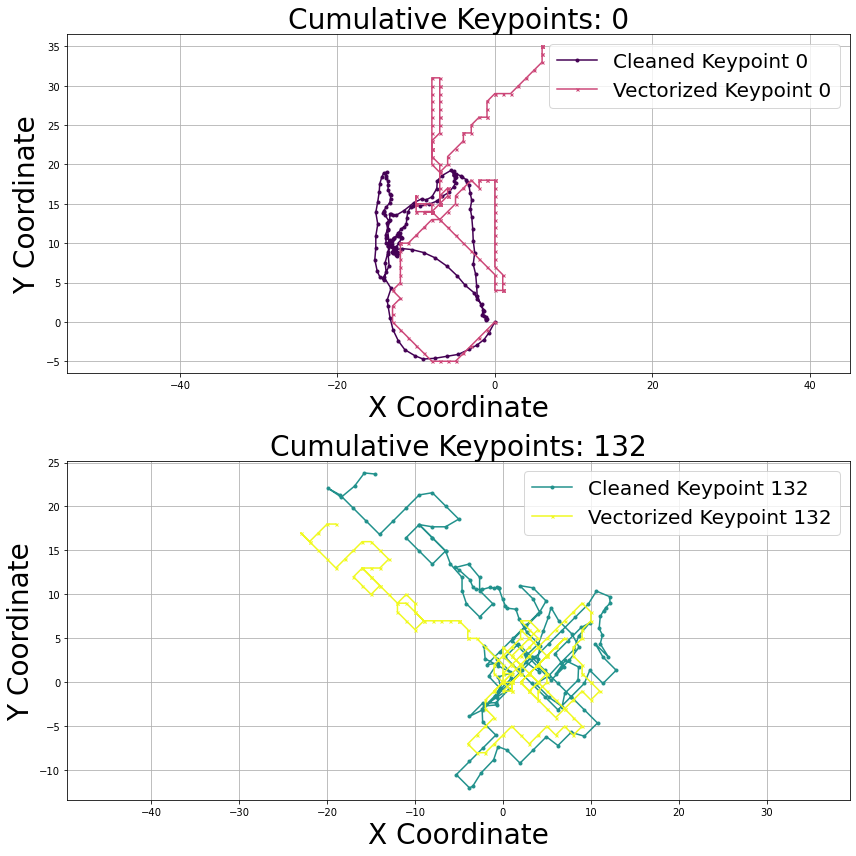

In [33]:
# Assuming cleaned_data and vectorized_data are already defined and populated

# Access the keypoints from the cleaned and vectorized data
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access cleaned keypoints
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Access vectorized keypoints

# Specify the indices of the keypoints to track; for example, track keypoints 0 and 132
keypoints_to_track = [0, 132]  # Replace with desired keypoint indices
num_keypoints_to_track = len(keypoints_to_track)

# Initialize cumulative sum arrays for cleaned and vectorized keypoints to track specific points
cumulative_sum_cleaned = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates
cumulative_sum_vectorized = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates

# Generate colormaps
colors_cleaned = plt.cm.viridis(np.linspace(0, 0.5, num_keypoints_to_track))
colors_vectorized = plt.cm.plasma(np.linspace(0.5, 1, num_keypoints_to_track))

# Initialize lists to record all trajectory points for plotting
all_trajectories_cleaned = [[] for _ in range(num_keypoints_to_track)]
all_trajectories_vectorized = [[] for _ in range(num_keypoints_to_track)]

# Iterate through each frame to calculate cumulative keypoints
for id in range(len(vectorized_keypoints)):
    # Extract the current frame's keypoints for cleaned and vectorized data
    current_cleaned = cleaned_keypoints[id]
    current_vectorized = vectorized_keypoints[id]

    # Update cumulative sums for cleaned and vectorized keypoints
    for i in range(num_keypoints_to_track):
        tracked_cleaned = current_cleaned[keypoints_to_track[i]]
        tracked_vectorized = current_vectorized[keypoints_to_track[i]]

        cumulative_sum_cleaned[i] += tracked_cleaned[:2]  # Take x and y only
        cumulative_sum_vectorized[i] += tracked_vectorized[:2]  # Take x and y only

        # Store the current positions for trajectory plotting
        all_trajectories_cleaned[i].append(cumulative_sum_cleaned[i].copy())
        all_trajectories_vectorized[i].append(cumulative_sum_vectorized[i].copy())

# Create a figure
plt.figure(figsize=(12, 12))

# Plot cleaned and vectorized keypoints together
for i in range(num_keypoints_to_track):
    plt.subplot(num_keypoints_to_track, 1, i + 1)  # Create subplots for each keypoint
    trajectory_cleaned = np.array(all_trajectories_cleaned[i])
    trajectory_vectorized = np.array(all_trajectories_vectorized[i])

    # Plot cleaned keypoints
    if trajectory_cleaned.size > 0:  # Check if data exists
        plt.plot(trajectory_cleaned[:, 0], trajectory_cleaned[:, 1], color=colors_cleaned[i], marker='o', markersize=3, label=f'Cleaned Keypoint {keypoints_to_track[i]}')

    # Plot vectorized keypoints
    if trajectory_vectorized.size > 0:  # Check if data exists
        plt.plot(trajectory_vectorized[:, 0], trajectory_vectorized[:, 1], color=colors_vectorized[i], marker='x', markersize=3, label=f'Vectorized Keypoint {keypoints_to_track[i]}')

    # Title and labels for each subplot
    plt.title(f'Cumulative Keypoints: {keypoints_to_track[i]}', fontsize=28)
    plt.xlabel('X Coordinate', fontsize=28)
    plt.ylabel('Y Coordinate', fontsize=28)
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio
    plt.legend(fontsize=20)  # Add legend for each subplot

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


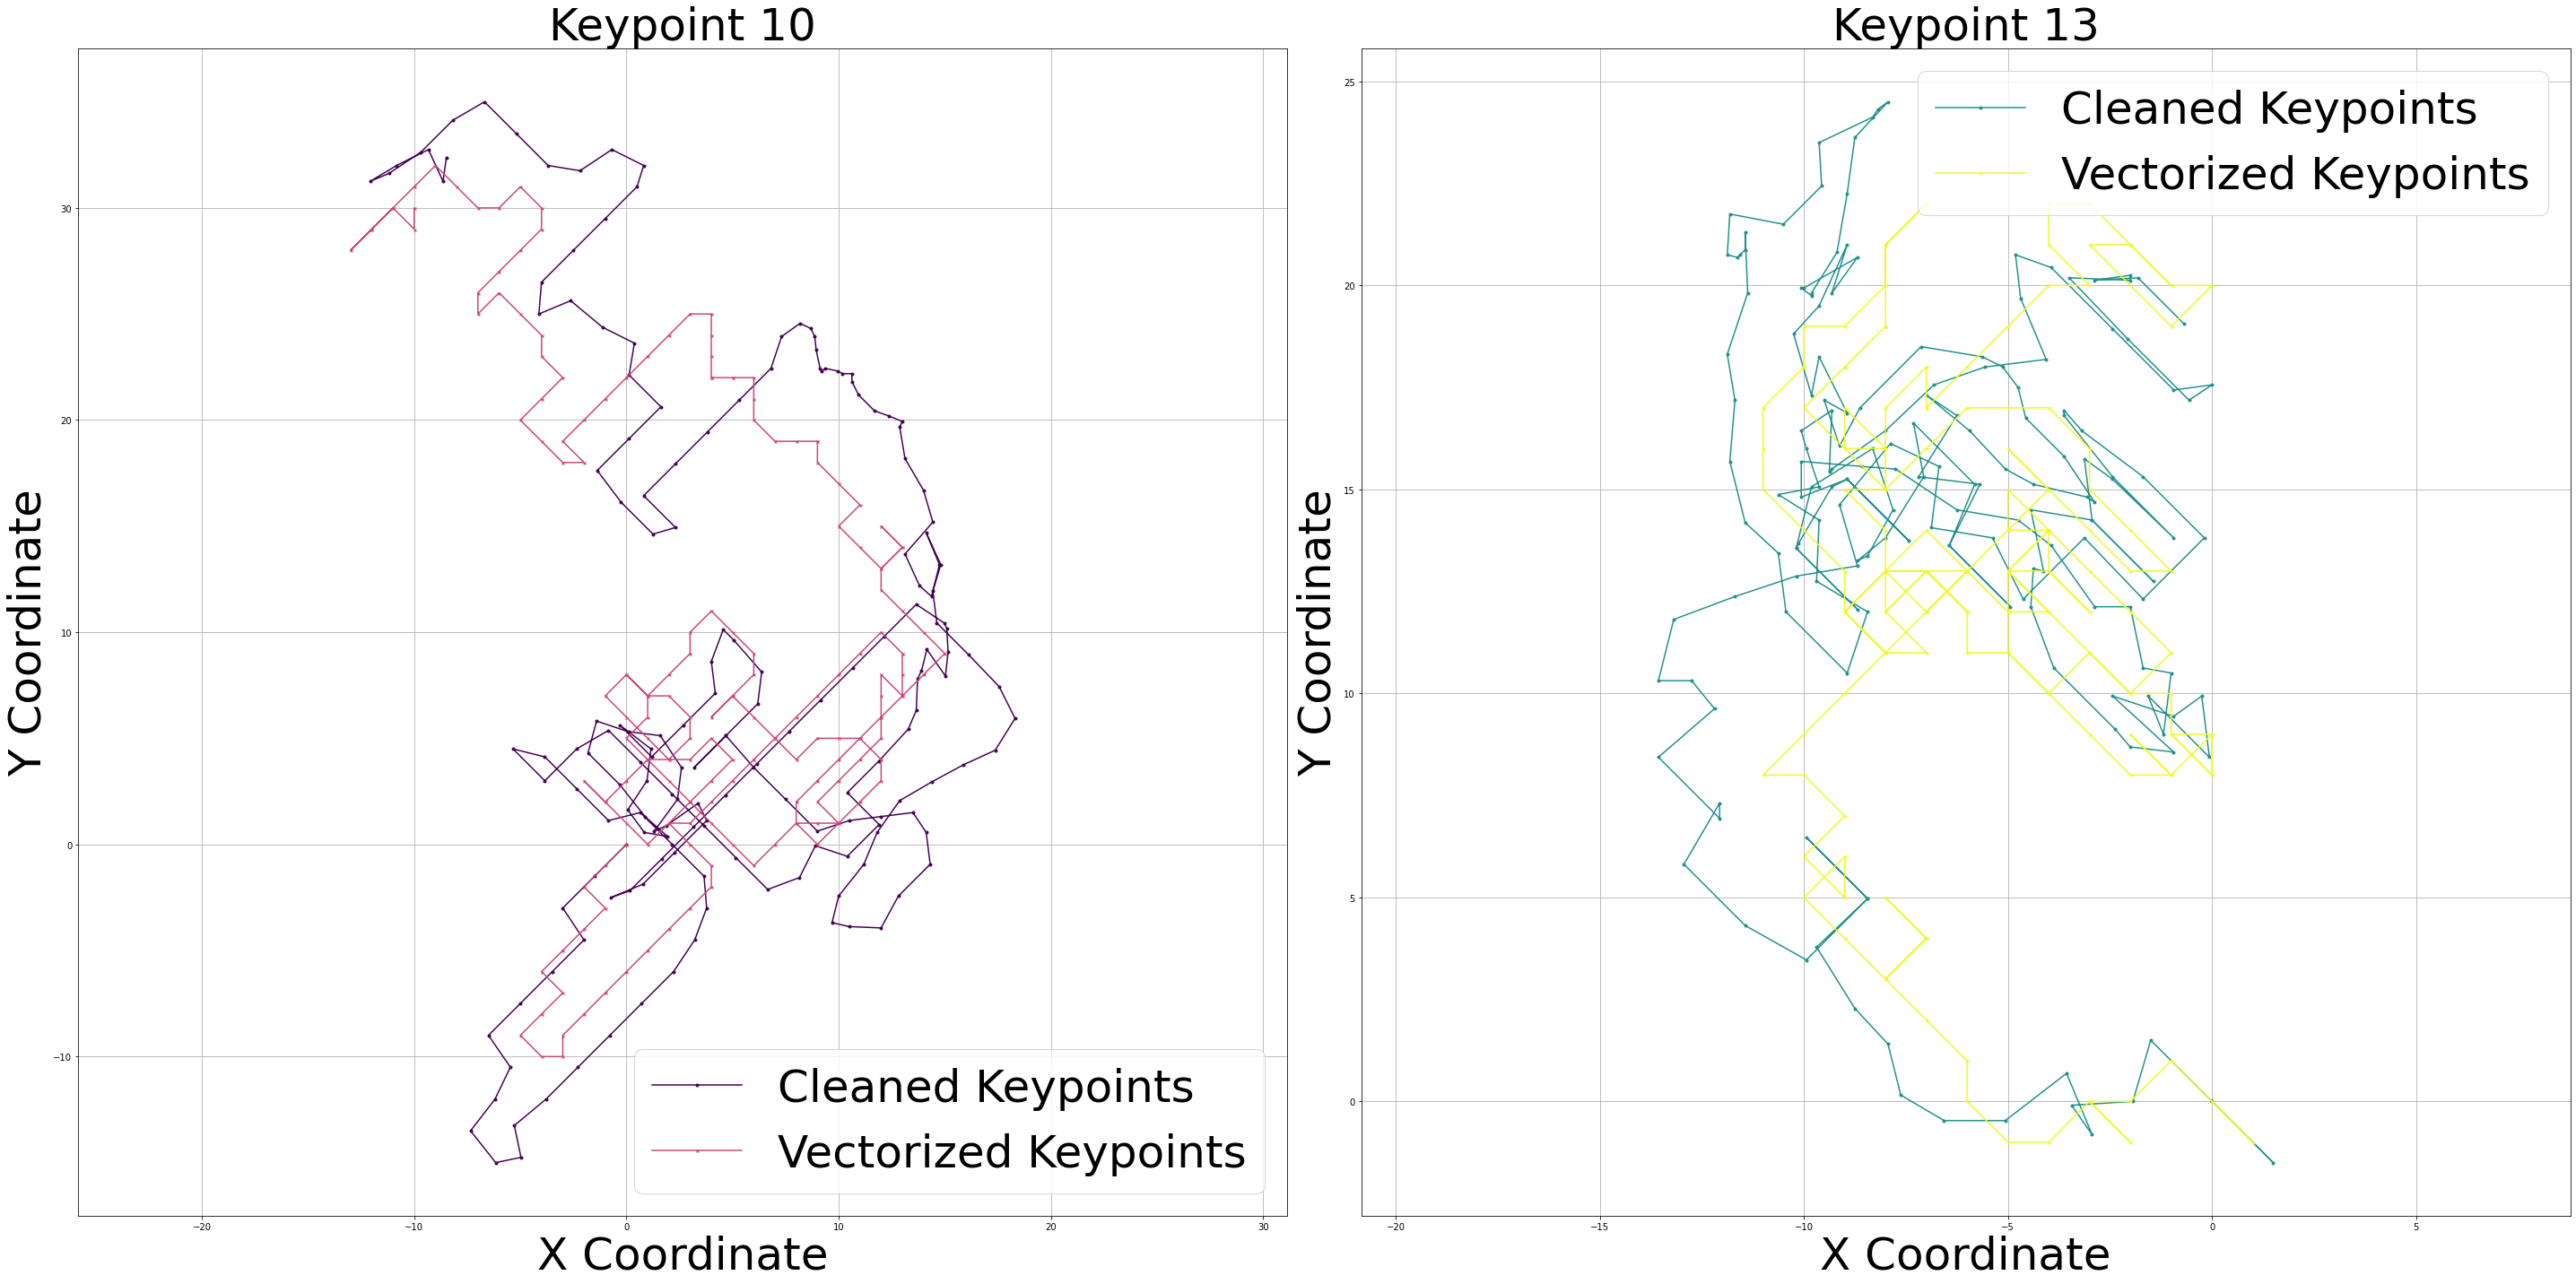

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Access the keypoints from the cleaned and vectorized data
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access cleaned keypoints
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Access vectorized keypoints

# Specify the indices of the keypoints to track; for example, track keypoints 0 and 132
keypoints_to_track = [10, 13]  # Replace with desired keypoint indices
num_keypoints_to_track = len(keypoints_to_track)

# Initialize cumulative sum arrays for cleaned and vectorized keypoints to track specific points
cumulative_sum_cleaned = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates
cumulative_sum_vectorized = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates

# Generate colormaps
colors_cleaned = plt.cm.viridis(np.linspace(0, 0.5, num_keypoints_to_track))
colors_vectorized = plt.cm.plasma(np.linspace(0.5, 1, num_keypoints_to_track))

# Initialize lists to record all trajectory points for plotting
all_trajectories_cleaned = [[] for _ in range(num_keypoints_to_track)]
all_trajectories_vectorized = [[] for _ in range(num_keypoints_to_track)]

# Iterate through each frame to calculate cumulative keypoints
for id in range(len(vectorized_keypoints)):
    # Extract the current frame's keypoints for cleaned and vectorized data
    current_cleaned = cleaned_keypoints[id]
    current_vectorized = vectorized_keypoints[id]

    # Update cumulative sums for cleaned and vectorized keypoints
    for i in range(num_keypoints_to_track):
        tracked_cleaned = current_cleaned[keypoints_to_track[i]]
        tracked_vectorized = current_vectorized[keypoints_to_track[i]]

        cumulative_sum_cleaned[i] += tracked_cleaned[:2]  # Take x and y only
        cumulative_sum_vectorized[i] += tracked_vectorized[:2]  # Take x and y only

        # Store the current positions for trajectory plotting
        all_trajectories_cleaned[i].append(cumulative_sum_cleaned[i].copy())
        all_trajectories_vectorized[i].append(cumulative_sum_vectorized[i].copy())

# Create a figure
plt.figure(figsize=(40, 20))

# Plot cleaned and vectorized keypoints side by side
for i in range(num_keypoints_to_track):
    # Create a subplot for each keypoint
    plt.subplot(1, num_keypoints_to_track, i + 1)  # 1 row, num_keypoints_to_track columns

    # Cumulative trajectories
    trajectory_cleaned = np.array(all_trajectories_cleaned[i])
    trajectory_vectorized = np.array(all_trajectories_vectorized[i])

    # Plot cleaned keypoints
    # if trajectory_cleaned.size > 0:  # Check if data exists
    #     plt.plot(trajectory_cleaned[:, 0], trajectory_cleaned[:, 1], color=colors_cleaned[i], marker='o', markersize=3, label='Cleaned Keypoints')
    #     plt.legend(fontsize=30)  # Add legend for each subplot
    # Plot vectorized keypoints
    # if trajectory_vectorized.size > 0:  # Check if data exists
    #     plt.plot(trajectory_vectorized[:, 0], trajectory_vectorized[:, 1], color=colors_vectorized[i], marker='x', markersize=3, label='Vectorized Keypoints')
    #     plt.legend(fontsize=30)  # Add legend for each subplot
    # Plot cleaned keypoints
    if trajectory_cleaned.size > 0:  # Check if data exists
        plt.plot(trajectory_cleaned[:, 0], trajectory_cleaned[:, 1], color=colors_cleaned[i], marker='o', markersize=3, label='Cleaned Keypoints')

    # Plot vectorized keypoints
    if trajectory_vectorized.size > 0:  # Check if data exists
        plt.plot(trajectory_vectorized[:, 0], trajectory_vectorized[:, 1], color=colors_vectorized[i], marker='x', markersize=3, label='Vectorized Keypoints')

    # Title and labels for each subplot
    plt.title(f'Keypoint {keypoints_to_track[i]}', fontsize=50)
    plt.xlabel('X Coordinate', fontsize=50)
    plt.ylabel('Y Coordinate', fontsize=50)
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio

    # Move plt.legend() outside of the loop
    plt.legend(fontsize=50)  # Adjust font size for better readability


    # Title and labels for each subplot
    plt.title(f'Keypoint {keypoints_to_track[i]}', fontsize=50)
    plt.xlabel('X Coordinate', fontsize=50)
    plt.ylabel('Y Coordinate', fontsize=50)
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio
    plt.legend(fontsize=50)  # Add legend for each subplot

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Draw in one window

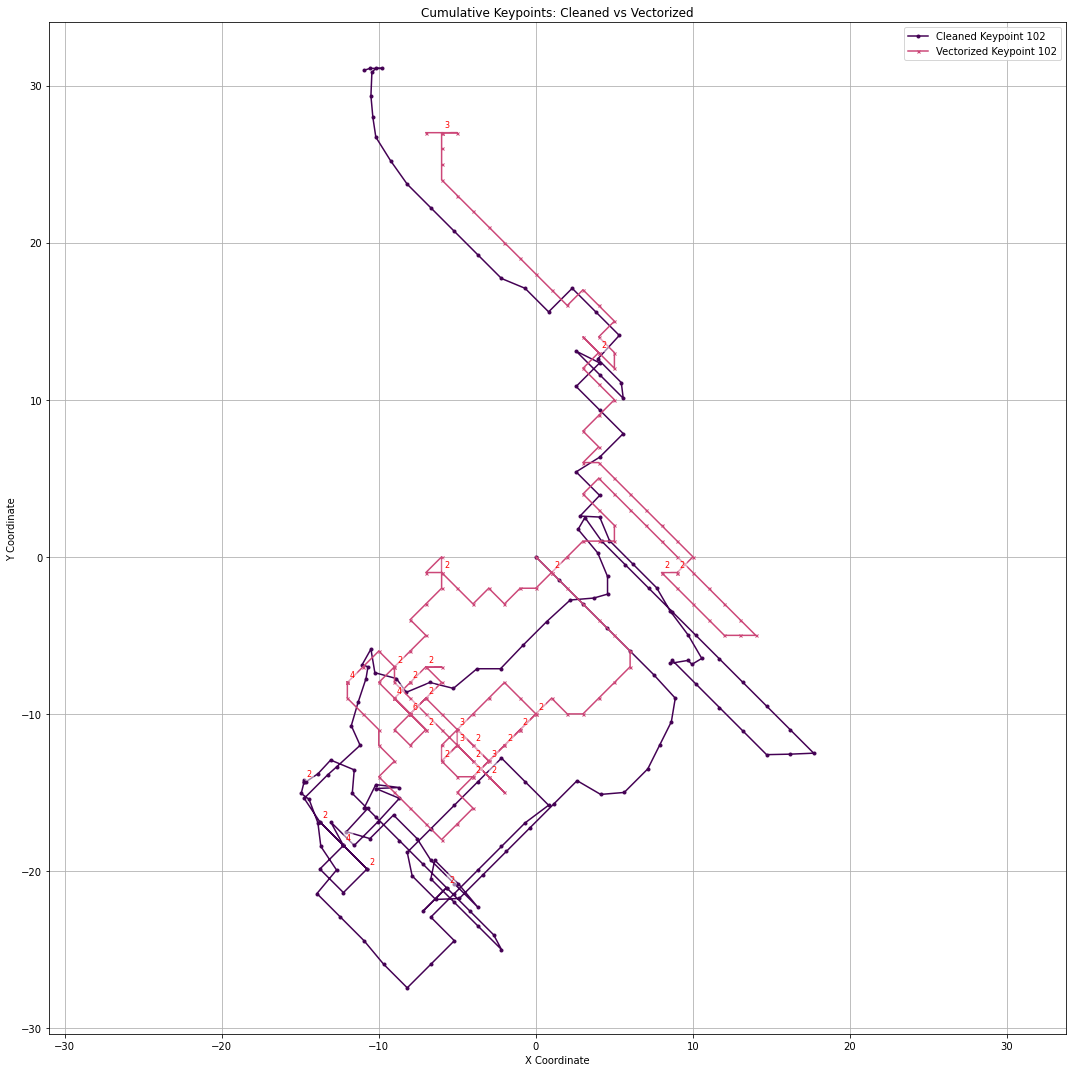

In [11]:
# Access the keypoints from the cleaned and vectorized data
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access cleaned keypoints
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Access vectorized keypoints

# Specify the indices of the keypoints to track; for example, track keypoints 0
keypoints_to_track = [102]  # Replace with desired keypoint indices
num_keypoints_to_track = len(keypoints_to_track)

# Initialize cumulative sum arrays for cleaned and vectorized keypoints to track specific points
cumulative_sum_cleaned = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates
cumulative_sum_vectorized = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates

# Generate a colormap to assign unique colors for each keypoint
colors_cleaned = plt.cm.viridis(np.linspace(0, 0.5, num_keypoints_to_track))  # Use a colormap for cleaned keypoints
colors_vectorized = plt.cm.plasma(np.linspace(0.5, 1, num_keypoints_to_track))  # Use a different colormap for vectorized keypoints

# Initialize lists to record all trajectory points for plotting
all_trajectories_cleaned = [[] for _ in range(num_keypoints_to_track)]
all_trajectories_vectorized = [[] for _ in range(num_keypoints_to_track)]

# Iterate through each frame to calculate cumulative keypoints
for id in range(len(vectorized_keypoints)):
    # Extract the current frame's keypoints for cleaned and vectorized data
    current_cleaned = cleaned_keypoints[id]
    current_vectorized = vectorized_keypoints[id]

    # Select only the keypoints to track
    tracked_cleaned = current_cleaned[keypoints_to_track]
    tracked_vectorized = current_vectorized[keypoints_to_track]

    # Update cumulative sums for cleaned and vectorized keypoints
    cumulative_sum_cleaned += tracked_cleaned[:, :2]  # Take x and y only
    cumulative_sum_vectorized += tracked_vectorized[:, :2]  # Take x and y only

    # Store the current positions for trajectory plotting
    for i in range(num_keypoints_to_track):
        all_trajectories_cleaned[i].append(cumulative_sum_cleaned[i].copy())
        all_trajectories_vectorized[i].append(cumulative_sum_vectorized[i].copy())

# Create a single plot for all frames
plt.figure(figsize=(15, 15))  # Set figure size

# Plot for cumulative cleaned keypoints
for i in range(num_keypoints_to_track):
    trajectory = np.array(all_trajectories_cleaned[i])
    plt.plot(trajectory[:, 0], trajectory[:, 1], color=colors_cleaned[i], marker='o', markersize=3, label=f'Cleaned Keypoint {keypoints_to_track[i]}')

# Plot for cumulative vectorized keypoints
for i in range(num_keypoints_to_track):
    trajectory = np.array(all_trajectories_vectorized[i])
    plt.plot(trajectory[:, 0], trajectory[:, 1], color=colors_vectorized[i], marker='x', markersize=3, label=f'Vectorized Keypoint {keypoints_to_track[i]}')

# Title and labels
plt.title('Cumulative Keypoints: Cleaned vs Vectorized')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.axis('equal')  # Keep equal aspect ratio

# Add annotations for overlapping keypoints for cleaned data
for i in range(num_keypoints_to_track):
    cleaned_counts = Counter(map(tuple, np.array(all_trajectories_cleaned[i])))
    for (x, y), count in cleaned_counts.items():
        if count > 1:  # Only annotate if there is more than one keypoint
            plt.annotate(f'{count}', xy=(x, y), xytext=(5, 5), textcoords='offset points',
                         fontsize=8, color='red', ha='center',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

# Add annotations for overlapping keypoints for vectorized data
for i in range(num_keypoints_to_track):
    vectorized_counts = Counter(map(tuple, np.array(all_trajectories_vectorized[i])))
    for (x, y), count in vectorized_counts.items():
        if count > 1:  # Only annotate if there is more than one keypoint
            plt.annotate(f'{count}', xy=(x, y), xytext=(5, 5), textcoords='offset points',
                         fontsize=8, color='red', ha='center',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

# Adjust layout and display the plot
plt.tight_layout()
plt.legend()
plt.show()

### Draw all keypoints


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Access the keypoints from the cleaned and vectorized data
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access cleaned keypoints
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Access vectorized keypoints

# Track all keypoints (instead of just one keypoint)
keypoints_to_track = list(range(num_keypoints))  # Tracking all keypoints
num_keypoints_to_track = len(keypoints_to_track)

# Initialize cumulative sum arrays for cleaned and vectorized keypoints
cumulative_sum_cleaned = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates
cumulative_sum_vectorized = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates

# Generate colormaps to assign unique colors for cleaned and vectorized keypoints
colors_cleaned = plt.cm.viridis(np.linspace(0, 0.5, num_keypoints_to_track))  # Colormap for cleaned keypoints
colors_vectorized = plt.cm.plasma(np.linspace(0.5, 1, num_keypoints_to_track))  # Colormap for vectorized keypoints

# Initialize lists to record all trajectory points for plotting
all_trajectories_cleaned = [[] for _ in range(num_keypoints_to_track)]
all_trajectories_vectorized = [[] for _ in range(num_keypoints_to_track)]

# Iterate through each frame to calculate cumulative keypoints
for id in range(len(vectorized_keypoints)):
    # Extract the current frame's keypoints for cleaned and vectorized data
    current_cleaned = cleaned_keypoints[id]
    current_vectorized = vectorized_keypoints[id]

    # Select all keypoints to track
    tracked_cleaned = current_cleaned[keypoints_to_track]
    tracked_vectorized = current_vectorized[keypoints_to_track]

    # Update cumulative sums for cleaned and vectorized keypoints
    cumulative_sum_cleaned += tracked_cleaned[:, :2]  # Take x and y only
    cumulative_sum_vectorized += tracked_vectorized[:, :2]  # Take x and y only

    # Store the current positions for trajectory plotting
    for i in range(num_keypoints_to_track):
        all_trajectories_cleaned[i].append(cumulative_sum_cleaned[i].copy())
        all_trajectories_vectorized[i].append(cumulative_sum_vectorized[i].copy())

# Create a single plot for all frames
plt.figure(figsize=(12, 12))  # Set figure size

# Plot cumulative cleaned keypoints
for i in range(num_keypoints_to_track):
    trajectory = np.array(all_trajectories_cleaned[i])
    plt.plot(trajectory[:, 0], trajectory[:, 1], color=colors_cleaned[i], marker='o', markersize=3, label=f'Cleaned Keypoint {keypoints_to_track[i]}')

# Plot cumulative vectorized keypoints
for i in range(num_keyimport numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Access the keypoints from the cleaned and vectorized data
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access cleaned keypoints
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Access vectorized keypoints

# Specify the indices of the two keypoints to track
keypoints_to_track = [0, 1]  # Replace with desired keypoint indices (e.g., keypoint 0 and 1)
num_keypoints_to_track = len(keypoints_to_track)

# Initialize cumulative sum arrays for cleaned and vectorized keypoints
cumulative_sum_cleaned = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates
cumulative_sum_vectorized = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates

# Generate colormaps to assign unique colors for the two keypoints
colors_cleaned = plt.cm.viridis(np.linspace(0, 0.5, num_keypoints_to_track))  # Colors for cleaned keypoints
colors_vectorized = plt.cm.plasma(np.linspace(0.5, 1, num_keypoints_to_track))  # Colors for vectorized keypoints

# Initialize lists to record all trajectory points for plotting
all_trajectories_cleaned = [[] for _ in range(num_keypoints_to_track)]
all_trajectories_vectorized = [[] for _ in range(num_keypoints_to_track)]

# Iterate through each frame to calculate cumulative keypoints
for id in range(len(vectorized_keypoints)):
    # Extract the current frame's keypoints for cleaned and vectorized data
    current_cleaned = cleaned_keypoints[id]
    current_vectorized = vectorized_keypoints[id]

    # Select only the two keypoints to track
    tracked_cleaned = current_cleaned[keypoints_to_track]
    tracked_vectorized = current_vectorized[keypoints_to_track]

    # Update cumulative sums for cleaned and vectorized keypoints
    cumulative_sum_cleaned += tracked_cleaned[:, :2]  # Take x and y only
    cumulative_sum_vectorized += tracked_vectorized[:, :2]  # Take x and y only

    # Store the current positions for trajectory plotting
    for i in range(num_keypoints_to_track):
        all_trajectories_cleaned[i].append(cumulative_sum_cleaned[i].copy())
        all_trajectories_vectorized[i].append(cumulative_sum_vectorized[i].copy())

# Create two separate plots (one for cleaned and one for vectorized keypoints)
plt.figure(figsize=(12, 6))  # Set figure size

# Left plot for cumulative cleaned keypoints
plt.subplot(1, 2, 1)
for i in range(num_keypoints_to_track):
    trajectory = np.array(all_trajectories_cleaned[i])
    plt.plot(trajectory[:, 0], trajectory[:, 1], color=colors_cleaned[i], marker='o', markersize=5, label=f'Cleaned Keypoint {keypoints_to_track[i]}')

plt.title('Cumulative Cleaned Keypoints (Two Keypoints)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.axis('equal')  # Keep equal aspect ratio
plt.legend()

# Right plot for cumulative vectorized keypoints
plt.subplot(1, 2, 2)
for i in range(num_keypoints_to_track):
    trajectory = np.array(all_trajectories_vectorized[i])
    plt.plot(trajectory[:, 0], trajectory[:, 1], color=colors_vectorized[i], marker='x', markersize=5, label=f'Vectorized Keypoint {keypoints_to_track[i]}')

plt.title('Cumulative Vectorized Keypoints (Two Keypoints)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.axis('equal')  # Keep equal aspect ratio
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
points_to_track):
    trajectory = np.array(all_trajectories_vectorized[i])
    plt.plot(trajectory[:, 0], trajectory[:, 1], color=colors_vectorized[i], marker='x', markersize=3, label=f'Vectorized Keypoint {keypoints_to_track[i]}')

# Title and labels
plt.title('Cumulative Keypoints: Cleaned vs Vectorized (All Keypoints)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.axis('equal')  # Keep equal aspect ratio

# Add annotations for overlapping keypoints in cleaned data
for i in range(num_keypoints_to_track):
    cleaned_counts = Counter(map(tuple, np.array(all_trajectories_cleaned[i])))
    for (x, y), count in cleaned_counts.items():
        if count > 1:  # Only annotate if more than one keypoint overlaps
            plt.annotate(f'{count}', xy=(x, y), xytext=(5, 5), textcoords='offset points',
                         fontsize=8, color='red', ha='center',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

# Add annotations for overlapping keypoints in vectorized data
for i in range(num_keypoints_to_track):
    vectorized_counts = Couimport numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Access the keypoints from the cleaned and vectorized data
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access cleaned keypoints
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Access vectorized keypoints

# Specify the indices of the keypoints to track; for example, track keypoints 0 and 132
keypoints_to_track = [0, 132]  # Track two keypoints (can replace with any keypoint indices)
num_keypoints_to_track = len(keypoints_to_track)

# Initialize cumulative sum arrays for cleaned and vectorized keypoints to track specific points
cumulative_sum_cleaned = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates
cumulative_sum_vectorized = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates

# Generate colormaps to differentiate cleaned and vectorized keypoints
colors_cleaned = plt.cm.viridis(np.linspace(0, 0.5, num_keypoints_to_track))  # Colors for cleaned
colors_vectorized = plt.cm.plasma(np.linspace(0.5, 1, num_keypoints_to_track))  # Colors for vectorized

# Initialize lists to record all trajectory points for plotting
all_trajectories_cleaned = [[] for _ in range(num_keypoints_to_track)]
all_trajectories_vectorized = [[] for _ in range(num_keypoints_to_track)]

# Iterate through each frame to calculate cumulative keypoints
for id in range(len(vectorized_keypoints)):
    # Extract the current frame's keypoints for cleaned and vectorized data
    current_cleaned = cleaned_keypoints[id]
    current_vectorized = vectorized_keypoints[id]

    # Select only the keypoints to track
    tracked_cleaned = current_cleaned[keypoints_to_track]
    tracked_vectorized = current_vectorized[keypoints_to_track]

    # Update cumulative sums for cleaned and vectorized keypoints
    cumulative_sum_cleaned += tracked_cleaned[:, :2]  # Take x and y only
    cumulative_sum_vectorized += tracked_vectorized[:, :2]  # Take x and y only

    # Store the current positions for trajectory plotting
    for i in range(num_keypoints_to_track):
        all_trajectories_cleaned[i].append(cumulative_sum_cleaned[i].copy())
        all_trajectories_vectorized[i].append(cumulative_sum_vectorized[i].copy())

# Create a single plot for all frames
plt.figure(figsize=(12, 12))  # Set figure size

# Plot for cumulative cleaned keypoints
for i in range(num_keypoints_to_track):
    trajectory_cleaned = np.array(all_trajectories_cleaned[i])
    plt.plot(trajectory_cleaned[:, 0], trajectory_cleaned[:, 1], color=colors_cleaned[i], marker='o', markersize=3, label=f'Cleaned Keypoint {keypoints_to_track[i]}')

# Plot for cumulative vectorized keypoints
for i in range(num_keypoints_to_track):
    trajectory_vectorized = np.array(all_trajectories_vectorized[i])
    plt.plot(trajectory_vectorized[:, 0], trajectory_vectorized[:, 1], color=colors_vectorized[i], marker='x', markersize=3, label=f'Vectorized Keypoint {keypoints_to_track[i]}')

# Title and labels
plt.title('Cumulative Trajectories of Two Keypoints: Cleaned vs Vectorized')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.axis('equal')  # Keep equal aspect ratio

# Add annotations for overlapping cleaned keypoints
for i in range(num_keypoints_to_track):
    cleaned_counts = Counter(map(tuple, np.array(all_trajectories_cleaned[i])))
    for (x, y), count in cleaned_counts.items():
        if count > 1:  # Only annotate if there is more than one keypoint
            plt.annotate(f'{count}', xy=(x, y), xytext=(5, 5), textcoords='offset points',
                         fontsize=8, color='red', ha='center',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

# Add annotations for overlapping vectorized keypoints
for i in range(num_keypoints_to_track):
    vectorized_counts = Counter(map(tuple, np.array(all_trajectories_vectorized[i])))
    for (x, y), count in vectorized_counts.items():
        if count > 1:  # Only annotate if there is more than one keypoint
            plt.annotate(f'{count}', xy=(x, y), xytext=(5, 5), textcoords='offset points',
                         fontsize=8, color='red', ha='center',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

# Adjust layout and display the plot
plt.tight_layout()
plt.legend()
plt.show()
nter(map(tuple, np.array(all_trajectories_vectorized[i])))
    for (x, y), count in vectorized_counts.items():
        if count > 1:  # Only annotate if more than one keypoint overlaps
            plt.annotate(f'{count}', xy=(x, y), xytext=(5, 5), textcoords='offset points',
                         fontsize=8, color='red', ha='center',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

# Adjust layout and display the plot
plt.tight_layout()
plt.legend()
plt.show()


SyntaxError: invalid syntax (<ipython-input-8-44a83c4609b7>, line 53)

### Draw only keypoints

<Figure size 432x288 with 0 Axes>

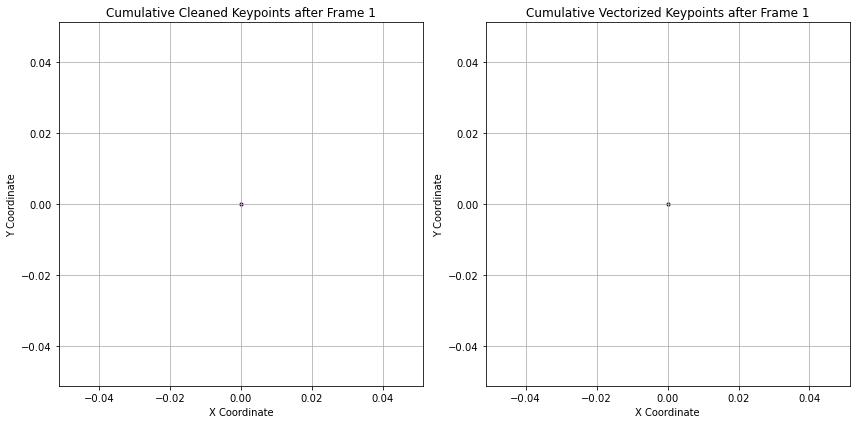

<Figure size 432x288 with 0 Axes>

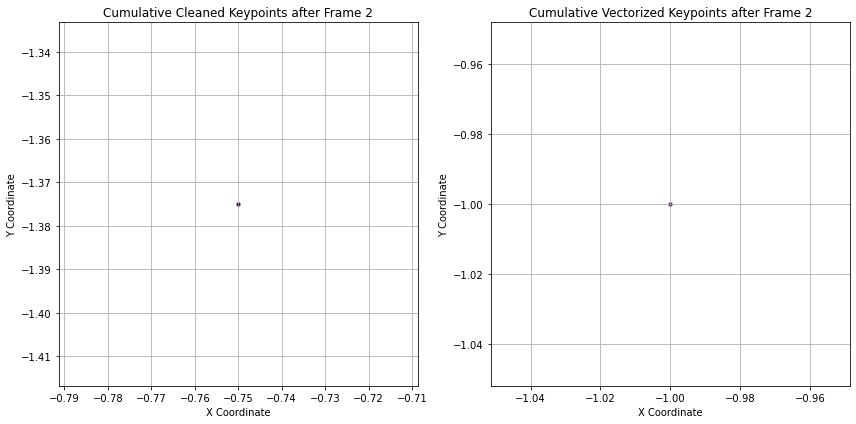

<Figure size 432x288 with 0 Axes>

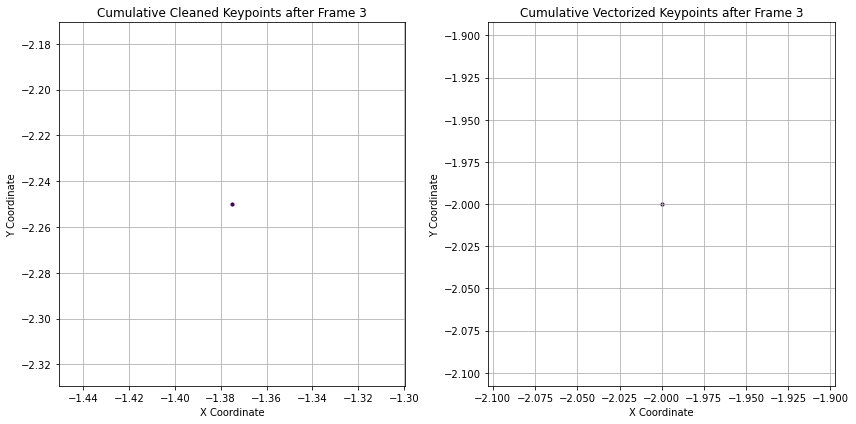

<Figure size 432x288 with 0 Axes>

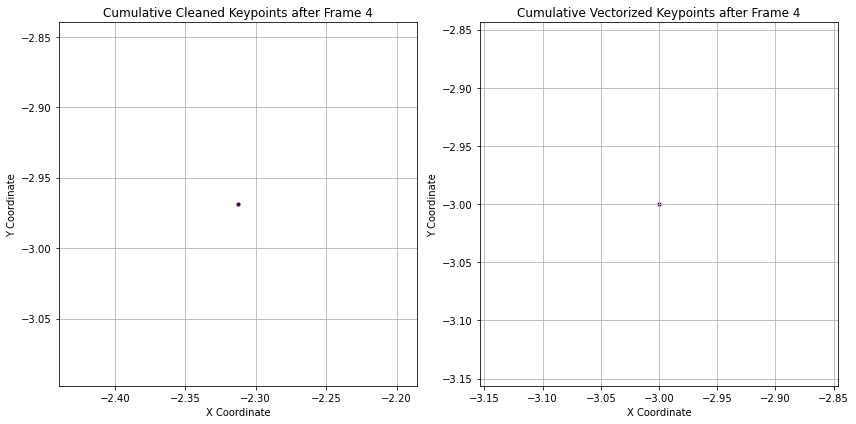

<Figure size 432x288 with 0 Axes>

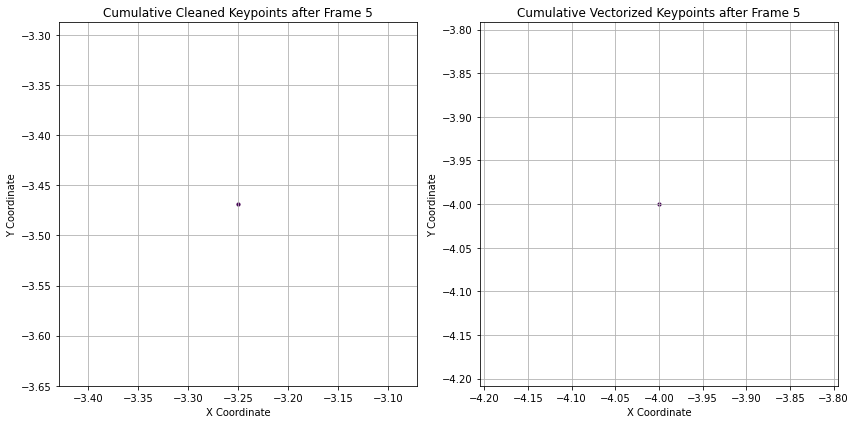

<Figure size 432x288 with 0 Axes>

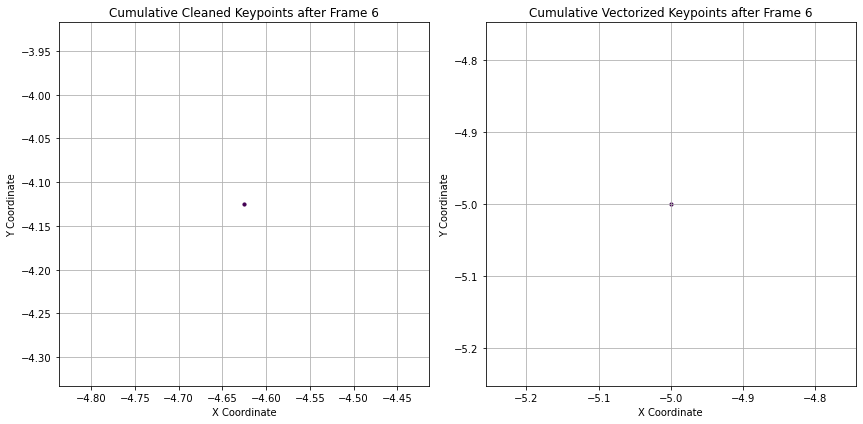

<Figure size 432x288 with 0 Axes>

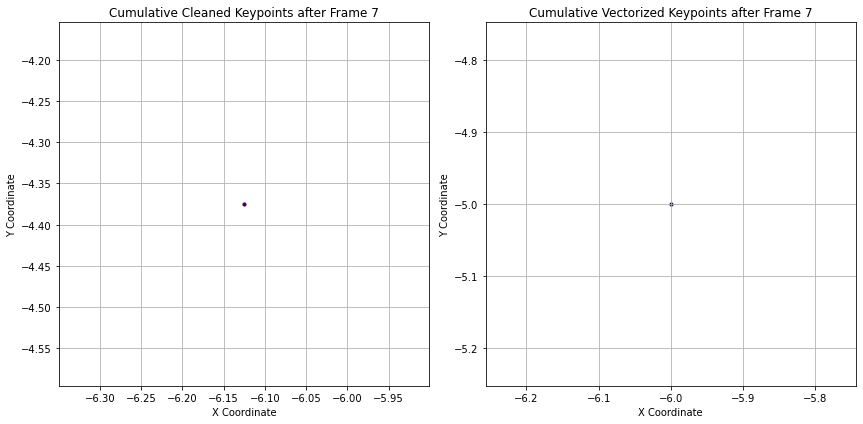

<Figure size 432x288 with 0 Axes>

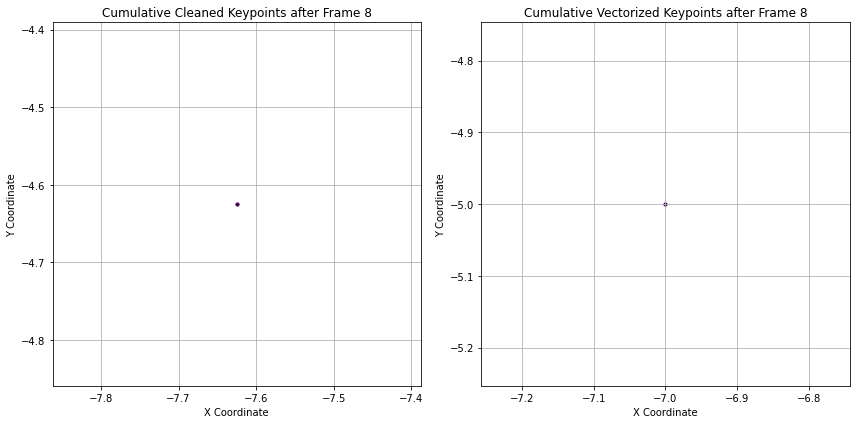

<Figure size 432x288 with 0 Axes>

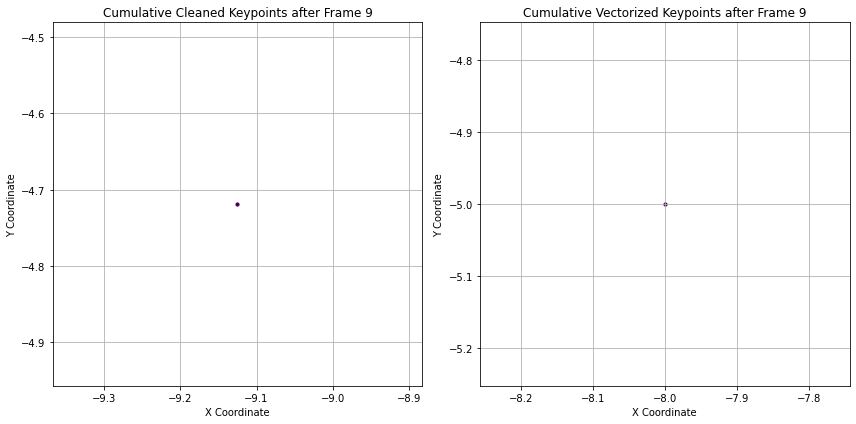

<Figure size 432x288 with 0 Axes>

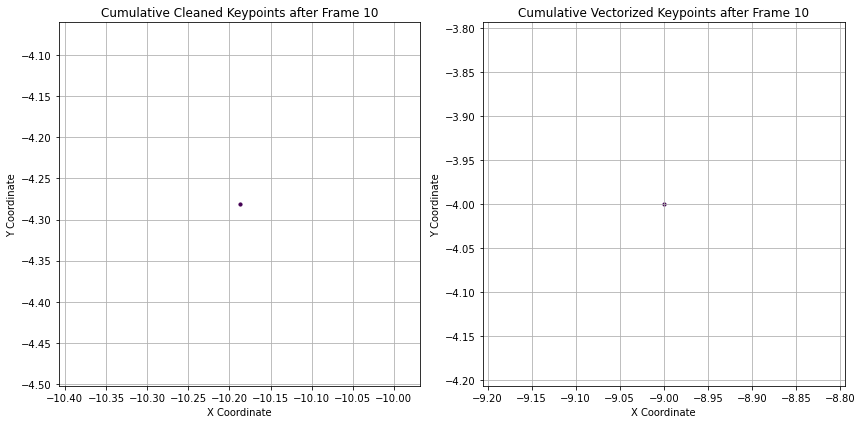

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Sample data for demonstration: Simulated keypoints for multiple frames
num_frames = 10  # Total number of frames
num_keypoints = 133  # Total keypoints for each frame

# Access the keypoints from the cleaned and vectorized data (assumed to be in the desired format)
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access cleaned keypoints
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Access vectorized keypoints

# Specify the indices of the keypoints to track; for example, track keypoints 1, 2, and 5
keypoints_to_track = [0] # [1, 2, 3]  # Replace with desired keypoint indices
num_keypoints_to_track = len(keypoints_to_track)

# Initialize cumulative sum arrays for cleaned and vectorized keypoints to track specific points
cumulative_sum_cleaned = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates
cumulative_sum_vectorized = np.zeros((num_keypoints_to_track, 2))  # 2 for (x, y) coordinates

# Generate a colormap to assign unique colors for each keypoint
colors = plt.cm.viridis(np.linspace(0, 1, num_keypoints_to_track))  # Use a colormap for colors

# Iterate through each frame to calculate and plot cumulative keypoints
for id in range(num_frames):
    # Extract the current frame's keypoints for cleaned and vectorized data
    current_cleaned = cleaned_keypoints[id]
    current_vectorized = vectorized_keypoints[id]

    # Select only the keypoints to track
    tracked_cleaned = current_cleaned[keypoints_to_track]
    tracked_vectorized = current_vectorized[keypoints_to_track]

    # Update cumulative sums for cleaned and vectorized keypoints
    cumulative_sum_cleaned += tracked_cleaned[:, :2]  # Take x and y only
    cumulative_sum_vectorized += tracked_vectorized[:, :2]  # Take x and y only

    # Clear the previous plot
    plt.clf()

    # Create a two-column layout for the plots
    plt.figure(figsize=(12, 6))  # Set figure size

    # Left column for cleaned keypoints
    plt.subplot(1, 2, 1)
    plt.scatter(cumulative_sum_cleaned[:, 0], cumulative_sum_cleaned[:, 1],
                color=colors, marker='o', s=10)
    plt.title(f'Cumulative Cleaned Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio

    # Add annotations for overlapping cleaned keypoints
    cleaned_counts = Counter(map(tuple, tracked_cleaned[:, :2]))
    for (x, y), count in cleaned_counts.items():
        if count > 1:  # Only annotate if there is more than one keypoint
            plt.annotate(f'{count}', xy=(x, y), xytext=(5, 5), textcoords='offset points',
                         fontsize=8, color='red', ha='center',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

    # Right column for vectorized keypoints
    plt.subplot(1, 2, 2)
    plt.scatter(cumulative_sum_vectorized[:, 0], cumulative_sum_vectorized[:, 1],
                color=colors, marker='o', s=10)
    plt.title(f'Cumulative Vectorized Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio

    # Add annotations for overlapping vectorized keypoints
    vectorized_counts = Counter(map(tuple, tracked_vectorized[:, :2]))
    for (x, y), count in vectorized_counts.items():
        if count > 1:  # Only annotate if there is more than one keypoint
            plt.annotate(f'{count}', xy=(x, y), xytext=(5, 5), textcoords='offset points',
                         fontsize=8, color='red', ha='center',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Pause for user input before continuing to the next frame
    input("Press Enter to continue...")

### How many keypoint are overlaping?

<Figure size 432x288 with 0 Axes>

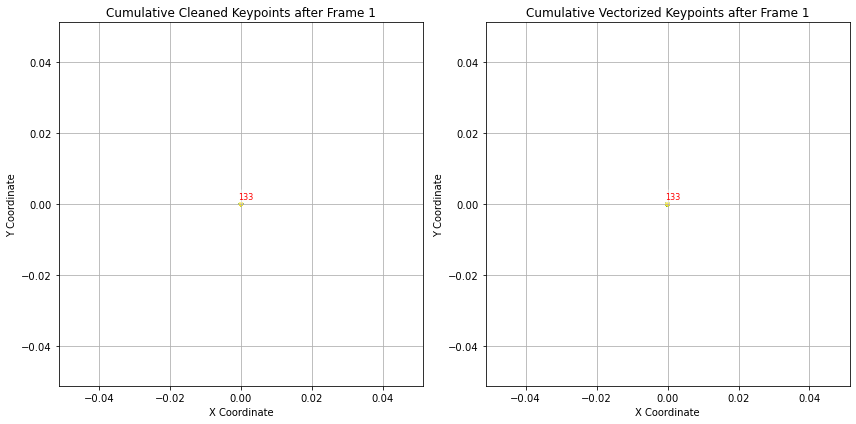

<Figure size 432x288 with 0 Axes>

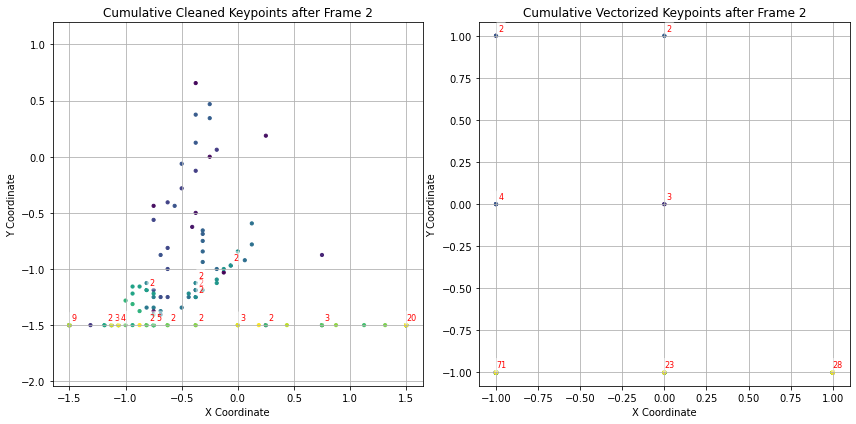

<Figure size 432x288 with 0 Axes>

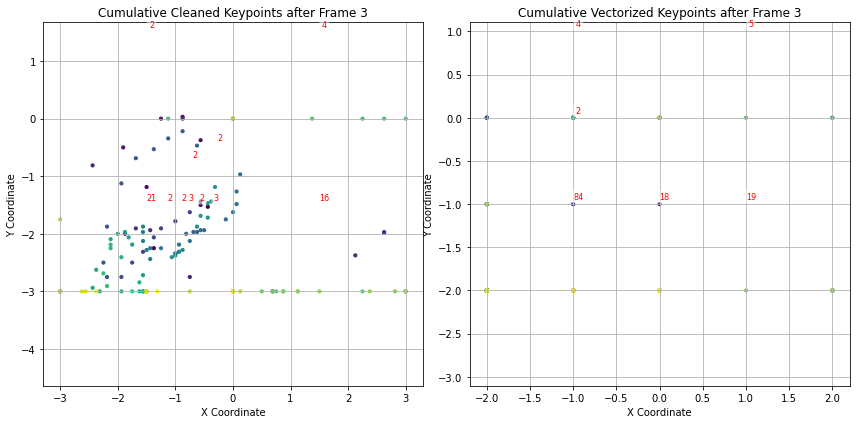

<Figure size 432x288 with 0 Axes>

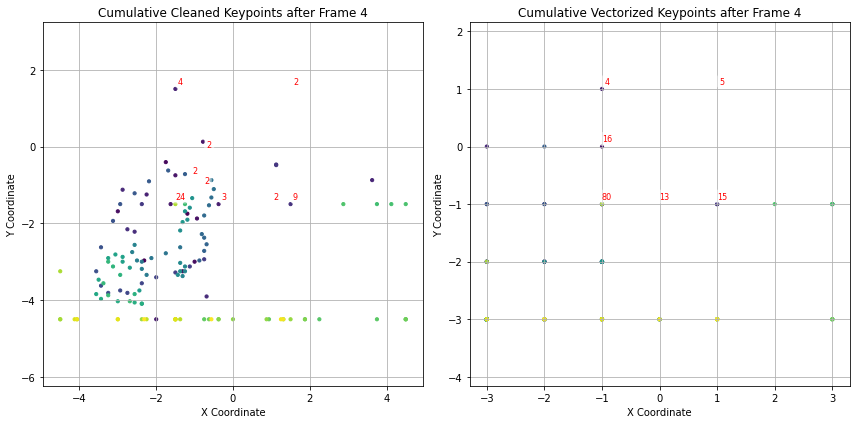

<Figure size 432x288 with 0 Axes>

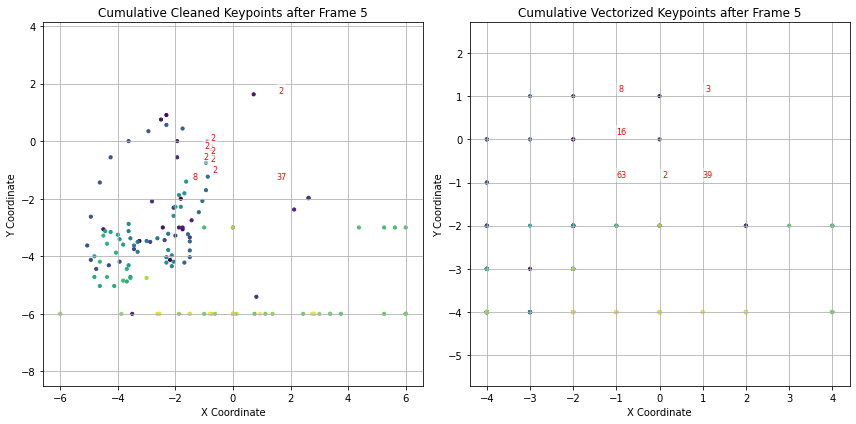

<Figure size 432x288 with 0 Axes>

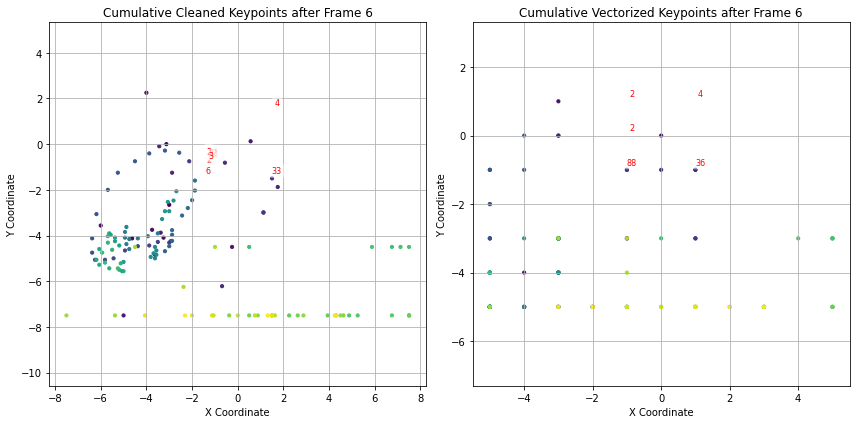

<Figure size 432x288 with 0 Axes>

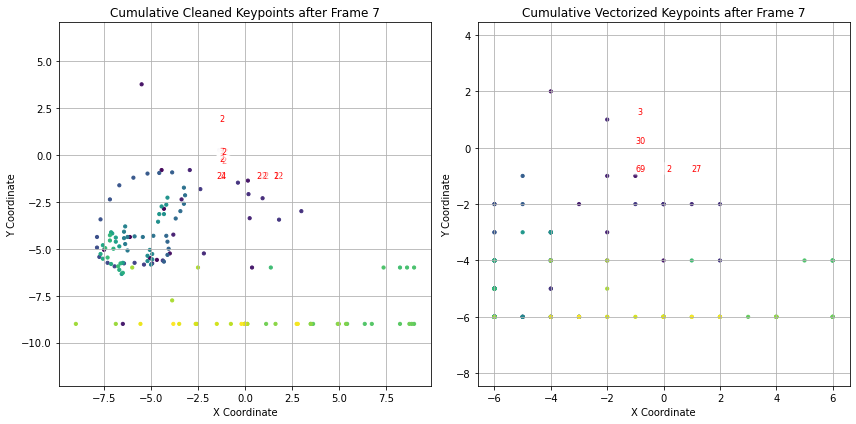

<Figure size 432x288 with 0 Axes>

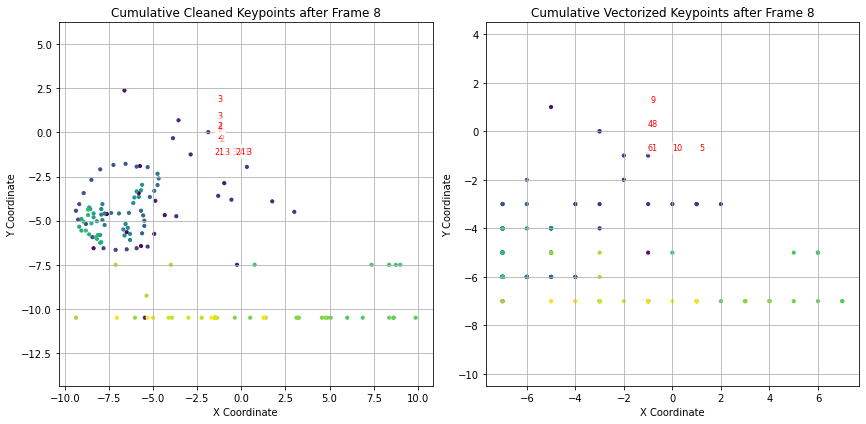

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Sample data for demonstration: Simulated keypoints for multiple frames
num_frames = 10  # Total number of frames
num_keypoints = 133  # Total keypoints for each frame

# Access the keypoints from the cleaned and vectorized data (assumed to be in the desired format)
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access cleaned keypoints
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Access vectorized keypoints

# Initialize cumulative sum arrays for cleaned and vectorized keypoints
cumulative_sum_cleaned = np.zeros((num_keypoints, 2))  # 2 for (x, y) coordinates
cumulative_sum_vectorized = np.zeros((num_keypoints, 2))  # 2 for (x, y) coordinates

# Generate a colormap to assign unique colors for each keypoint
colors = plt.cm.viridis(np.linspace(0, 1, num_keypoints))  # Use a colormap for colors

# Iterate through each frame to calculate and plot cumulative keypoints
for id in range(num_frames):
    # Extract the current frame's keypoints for cleaned and vectorized data
    current_cleaned = cleaned_keypoints[id]
    current_vectorized = vectorized_keypoints[id]

    # Update cumulative sums for cleaned and vectorized keypoints
    cumulative_sum_cleaned += current_cleaned[:, :2]  # Take x and y only
    cumulative_sum_vectorized += current_vectorized[:, :2]  # Take x and y only

    # Count overlapping keypoints
    cleaned_counts = Counter(map(tuple, current_cleaned[:, :2]))  # Count occurrences of each (x, y)
    vectorized_counts = Counter(map(tuple, current_vectorized[:, :2]))

    # Clear the previous plot
    plt.clf()

    # Create a two-column layout for the plots
    plt.figure(figsize=(12, 6))  # Set figure size

    # Left column for cleaned keypoints
    plt.subplot(1, 2, 1)
    plt.scatter(cumulative_sum_cleaned[:, 0], cumulative_sum_cleaned[:, 1],
                color=colors, marker='o', s=10)
    plt.title(f'Cumulative Cleaned Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio

    # Add annotations for overlapping cleaned keypoints
    for (x, y), count in cleaned_counts.items():
        if count > 1:  # Only annotate if there is more than one keypoint
            plt.annotate(f'{count}', xy=(x, y), xytext=(5, 5), textcoords='offset points',
                         fontsize=8, color='red', ha='center',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

    # Right column for vectorized keypoints
    plt.subplot(1, 2, 2)
    plt.scatter(cumulative_sum_vectorized[:, 0], cumulative_sum_vectorized[:, 1],
                color=colors, marker='o', s=10)
    plt.title(f'Cumulative Vectorized Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio

    # Add annotations for overlapping vectorized keypoints
    for (x, y), count in vectorized_counts.items():
        if count > 1:  # Only annotate if there is more than one keypoint
            plt.annotate(f'{count}', xy=(x, y), xytext=(5, 5), textcoords='offset points',
                         fontsize=8, color='red', ha='center',
                         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3'))

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Pause for user input before continuing to the next frame
    input("Press Enter to continue...")

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for demonstration: Simulated keypoints for multiple frames
num_frames = 10  # Total number of frames
num_keypoints = 133  # Total keypoints for each frame

# Access the keypoints from the cleaned and vectorized data (assumed to be in the desired format)
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access cleaned keypoints
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Access vectorized keypoints

# Initialize cumulative sum arrays for cleaned and vectorized keypoints
cumulative_sum_cleaned = np.zeros((num_keypoints, 2))  # 2 for (x, y) coordinates
cumulative_sum_vectorized = np.zeros((num_keypoints, 2))  # 2 for (x, y) coordinates

# Generate a colormap to assign unique colors for each keypoint
colors = plt.cm.viridis(np.linspace(0, 1, num_keypoints))  # Use a colormap for colors

# Store the original positions for the first frame to track movement
original_positions_cleaned = cleaned_keypoints[0][:, :2].copy()  
original_positions_vectorized = vectorized_keypoints[0][:, :2].copy()

# Iterate through each frame to calculate and plot cumulative keypoints
for id in range(num_frames):
    # Extract the current frame's keypoints for cleaned and vectorized data
    current_cleaned = cleaned_keypoints[id]
    current_vectorized = vectorized_keypoints[id]

    # Update cumulative sums for cleaned and vectorized keypoints
    cumulative_sum_cleaned += current_cleaned[:, :2]  # Take x and y only
    cumulative_sum_vectorized += current_vectorized[:, :2]  # Take x and y only

    # Clear the previous plot
    plt.clf()

    # Create a two-column layout for the plots
    plt.figure(figsize=(12, 6))  # Set figure size

    # Left column for cleaned keypoints
    plt.subplot(1, 2, 1)
    plt.scatter(cumulative_sum_cleaned[:, 0], cumulative_sum_cleaned[:, 1],
                color=colors, marker='o', s=10)
    plt.scatter(original_positions_cleaned[:, 0], original_positions_cleaned[:, 1],
                color='red', marker='x', label='Original Positions', s=50)  # Original points highlighted
    plt.title(f'Cumulative Cleaned Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio

    # Adjust x and y limits for cleaned keypoints
    min_x_cleaned, max_x_cleaned = np.min(cumulative_sum_cleaned[:, 0]), np.max(cumulative_sum_cleaned[:, 0])
    min_y_cleaned, max_y_cleaned = np.min(cumulative_sum_cleaned[:, 1]), np.max(cumulative_sum_cleaned[:, 1])
    plt.xlim(min_x_cleaned - 1, max_x_cleaned + 1)  # Add some padding
    plt.ylim(min_y_cleaned - 1, max_y_cleaned + 1)  # Add some padding
    plt.legend()

    # Right column for vectorized keypoints
    plt.subplot(1, 2, 2)
    plt.scatter(cumulative_sum_vectorized[:, 0], cumulative_sum_vectorized[:, 1],
                color=colors, marker='o', s=10)
    plt.scatter(original_positions_vectorized[:, 0], original_positions_vectorized[:, 1],
                color='red', marker='x', label='Original Positions', s=50)  # Original points highlighted
    plt.title(f'Cumulative Vectorized Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio

    # Adjust x and y limits for vectorized keypoints
    min_x_vectorized, max_x_vectorized = np.min(cumulative_sum_vectorized[:, 0]), np.max(cumulative_sum_vectorized[:, 0])
    min_y_vectorized, max_y_vectorized = np.min(cumulative_sum_vectorized[:, 1]), np.max(cumulative_sum_vectorized[:, 1])
    plt.xlim(min_x_vectorized - 1, max_x_vectorized + 1)  # Add some padding
    plt.ylim(min_y_vectorized - 1, max_y_vectorized + 1)  # Add some padding
    plt.legend()

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Pause for user input before continuing to the next frame
    input("Press Enter to continue...")

ModuleNotFoundError: No module named 'numpy'

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for demonstration: Simulated keypoints for multiple frames
num_frames = 10  # Total number of frames
num_keypoints = 133  # Total keypoints for each frame

# Access the keypoints from the cleaned and vectorized data (assumed to be in the desired format)
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access cleaned keypoints
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Access vectorized keypoints

# Initialize cumulative sum arrays for cleaned and vectorized keypoints
cumulative_sum_cleaned = np.zeros((num_keypoints, 2))  # 2 for (x, y) coordinates
cumulative_sum_vectorized = np.zeros((num_keypoints, 2))  # 2 for (x, y) coordinates

# Generate a colormap to assign unique colors for each keypoint
colors = plt.cm.viridis(np.linspace(0, 1, num_keypoints))  # Use a colormap for colors

# Iterate through each frame to calculate and plot cumulative keypoints
for id in range(num_frames):
    # Extract the current frame's keypoints for cleaned and vectorized data
    current_cleaned = cleaned_keypoints[id]
    current_vectorized = vectorized_keypoints[id]

    # Update cumulative sums for cleaned and vectorized keypoints
    cumulative_sum_cleaned += current_cleaned[:, :2]  # Take x and y only
    cumulative_sum_vectorized += current_vectorized[:, :2]  # Take x and y only

    # Clear the previous plot
    plt.clf()

    # Create a two-column layout for the plots
    plt.figure(figsize=(12, 6))  # Set figure size

    # Left column for cleaned keypoints
    plt.subplot(1, 2, 1)
    plt.scatter(cumulative_sum_cleaned[:, 0], cumulative_sum_cleaned[:, 1],
                color=colors, marker='o', s=10)
    plt.title(f'Cumulative Cleaned Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio

    # Adjust x and y limits for cleaned keypoints
    min_x_cleaned, max_x_cleaned = np.min(cumulative_sum_cleaned[:, 0]), np.max(cumulative_sum_cleaned[:, 0])
    min_y_cleaned, max_y_cleaned = np.min(cumulative_sum_cleaned[:, 1]), np.max(cumulative_sum_cleaned[:, 1])
    plt.xlim(min_x_cleaned - 1, max_x_cleaned + 1)  # Add some padding
    plt.ylim(min_y_cleaned - 1, max_y_cleaned + 1)  # Add some padding

    # Right column for vectorized keypoints
    plt.subplot(1, 2, 2)
    plt.scatter(cumulative_sum_vectorized[:, 0], cumulative_sum_vectorized[:, 1],
                color=colors, marker='o', s=10)
    plt.title(f'Cumulative Vectorized Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio

    # Adjust x and y limits for vectorized keypoints
    min_x_vectorized, max_x_vectorized = np.min(cumulative_sum_vectorized[:, 0]), np.max(cumulative_sum_vectorized[:, 0])
    min_y_vectorized, max_y_vectorized = np.min(cumulative_sum_vectorized[:, 1]), np.max(cumulative_sum_vectorized[:, 1])
    plt.xlim(min_x_vectorized - 1, max_x_vectorized + 1)  # Add some padding
    plt.ylim(min_y_vectorized - 1, max_y_vectorized + 1)  # Add some padding

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Pause for user input before continuing to the next frame
    input("Press Enter to continue...")

ModuleNotFoundError: No module named 'numpy'

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for demonstration: Simulated keypoints for multiple frames
num_frames = 10  # Total number of frames
num_keypoints = 133  # Total keypoints for each frame

# Access the keypoints from the cleaned data (assumed to be in the desired format)
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access the keypoints

# Initialize the cumulative sum array for x and y coordinates
cumulative_sum_xy = np.zeros((num_keypoints, 2))  # 2 for (x, y) coordinates

# Generate a colormap to assign unique colors for each keypoint
colors = plt.cm.viridis(np.linspace(0, 1, num_keypoints))  # Use a colormap for colors

# Iterate through each frame to calculate and plot cumulative keypoints
for id in range(num_frames):
    # Extract the current frame's keypoints
    current_frame = cleaned_keypoints[id]
    
    # Add the current frame's x and y coordinates to the cumulative sum
    cumulative_sum_xy += current_frame[:, :2]  # Take x and y only

    # Clear the previous plot
    plt.clf()

    # Print out current keypoints for debugging
    print(f"Frame {id + 1} keypoints:\n", current_frame)

    # Check if the keypoints are within expected limits
    min_x, max_x = np.min(cumulative_sum_xy[:, 0]), np.max(cumulative_sum_xy[:, 0])
    min_y, max_y = np.min(cumulative_sum_xy[:, 1]), np.max(cumulative_sum_xy[:, 1])
    print(f"X-axis range: ({min_x}, {max_x})")
    print(f"Y-axis range: ({min_y}, {max_y})")

    # Plot the cumulative keypoints for the current frame with scatter plot
    plt.scatter(cumulative_sum_xy[:, 0], cumulative_sum_xy[:, 1],
                color=colors, marker='o', s=10)

    # Customize the plot
    plt.title(f'Cumulative Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio

    # Adjust x and y limits based on cumulative keypoints
    plt.xlim(min_x - 1, max_x + 1)  # Add some padding
    plt.ylim(min_y - 1, max_y + 1)  # Add some padding

    # Display the plot
    plt.show()

    # Pause for user input before continuing to the next frame
    input("Press Enter to continue...")

ModuleNotFoundError: No module named 'numpy'

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for demonstration: Simulated keypoints for multiple frames
num_frames = 10  # Total number of frames
num_keypoints = 133  # Total keypoints for each frame

# Access the keypoints from the cleaned data (assumed to be in the desired format)
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access the keypoints

# Initialize the cumulative sum array for x and y coordinates
cumulative_sum_xy = np.zeros((num_keypoints, 2))  # 2 for (x, y) coordinates

# Generate a colormap to assign unique colors for each keypoint
colors = plt.cm.viridis(np.linspace(0, 1, num_keypoints))  # Use a colormap for colors

# Iterate through each frame to calculate and plot cumulative keypoints
for id in range(num_frames):
    # Extract the current frame's keypoints
    current_frame = cleaned_keypoints[id]
    
    # Add the current frame's x and y coordinates to the cumulative sum
    cumulative_sum_xy += current_frame[:, :2]  # Take x and y only

    # Clear the previous plot
    plt.clf()
    
    # Plot the cumulative keypoints for the current frame with arrow markers
    for i in range(num_keypoints):
        # Define the arrow shape for each keypoint
        plt.scatter(current_cleaned[i, 0], current_cleaned[i, 1],
                    color=colors[i], marker='o', s=10, label='Cleaned Keypoints' if i == 0 else "")
    
    # Customize the plot
    plt.title(f'Cumulative Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio
    plt.legend(loc='upper right')
    
    # Display the plot
    plt.show()
    
    # Pause for user input before continuing to the next frame
    input("Press Enter to continue...")

ModuleNotFoundError: No module named 'numpy'

In [9]:
cumulative_sum_xy

NameError: name 'cumulative_sum_xy' is not defined

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Sample data setup: Access the keypoints from cleaned and vectorized data
num_frames = 10  # Total number of frames
num_keypoints = 133  # Total keypoints for each frame

# Access the keypoints from the cleaned and vectorized data
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Cleaned keypoints
vectorized_keypoints = vectorized_data[first_video_key]['keypoints']  # Vectorized keypoints

# Create a new figure for the combined plots
plt.figure(figsize=(12, 8))

# Generate a colormap to assign a unique color for each keypoint
colors = plt.cm.viridis(np.linspace(0, 1, num_keypoints))  # Use a colormap for colors

# Iterate through each frame to compare cleaned and vectorized keypoints
for id in range(num_frames):
    # Clear the previous plot
    plt.clf()
    
    # Set up subplots for cleaned and vectorized keypoints
    plt.subplot(1, 2, 1)  # First subplot for cleaned keypoints
    current_cleaned = cleaned_keypoints[id]
    
    # Plot cleaned keypoints as arrow-shaped markers
    for i in range(num_keypoints):
        plt.scatter(current_cleaned[i, 0], current_cleaned[i, 1],
                    color=colors[i], marker='>', s=100, label='Cleaned Keypoints' if i == 0 else "")
    
    plt.title(f'Cleaned Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio
    plt.legend(loc='upper right')

    # Second subplot for vectorized keypoints
    plt.subplot(1, 2, 2)  # Second subplot for vectorized keypoints
    current_vectorized = vectorized_keypoints[id]
    
    # Plot vectorized keypoints as arrow-shaped markers
    for i in range(num_keypoints):
        plt.scatter(current_vectorized[i, 0], current_vectorized[i, 1],
                    color=colors[i], marker='<', s=100, label='Vectorized Keypoints' if i == 0 else "")
    
    plt.title(f'Vectorized Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio
    plt.legend(loc='upper right')
    
    # Display the plots
    plt.tight_layout()
    plt.show()
    
    # Pause for user input before continuing to the next frame
    input("Press Enter to continue...")

ModuleNotFoundError: No module named 'numpy'

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for demonstration: Access the keypoints from cleaned data
num_frames = 10  # Total number of frames
num_keypoints = 133  # Total keypoints for each frame
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access the keypoints

# Initialize a variable to hold the previous frame's keypoints
previous_frame = None

# Create a new figure for the combined plot
plt.figure(figsize=(12, 8))

# Iterate through each frame to calculate and plot keypoints with arrows
for id in range(num_frames):
    # Extract the current frame's keypoints
    current_frame = cleaned_keypoints[id]
    
    # If there is a previous frame, plot arrows indicating movement
    if previous_frame is not None:
        # Calculate the x and y differences for the arrows
        dx = current_frame[:, 0] - previous_frame[:, 0]  # Change in x
        dy = current_frame[:, 1] - previous_frame[:, 1]  # Change in y
        
        # Plot arrows to indicate movement
        plt.quiver(previous_frame[:, 0], previous_frame[:, 1], dx, dy,
                   angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)

    # Plot the keypoints for the current frame
    plt.scatter(current_frame[:, 0], current_frame[:, 1], color='b', label=f'Frame {id + 1}', s=50)

    # Update previous_frame for the next iteration
    previous_frame = current_frame.copy()

# Customize the overall plot
plt.title('Keypoints Movements Across All Frames', fontsize=16)
plt.xlabel('X Coordinate', fontsize=14)
plt.ylabel('Y Coordinate', fontsize=14)
plt.grid(True)
plt.axis('equal')  # Keep equal aspect ratio
plt.legend(loc='upper right')
plt.show()

ModuleNotFoundError: No module named 'numpy'

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for demonstration: Simulated keypoints for multiple frames
num_frames = 10  # Total number of frames
num_keypoints = 133  # Total keypoints for each frame

# Access the keypoints from the cleaned data (assumed to be in the desired format)
cleaned_keypoints = cleaned_data[first_video_key]['keypoints']  # Access the keypoints

# Initialize the cumulative sum array for x and y coordinates
cumulative_sum_xy = np.zeros((num_keypoints, 2))  # 2 for (x, y) coordinates

# Iterate through each frame to calculate and plot cumulative keypoints
for id in range(num_frames):
    # Extract the current frame's keypoints
    current_frame = cleaned_keypoints[id]
    
    # Add the current frame's x and y coordinates to the cumulative sum
    cumulative_sum_xy += current_frame[:, :2]  # Take x and y only
    
    # Clear the previous plot
    plt.clf()
    
    # Plot the cumulative keypoints for the current frame with markers only (no lines)
    plt.plot(cumulative_sum_xy[:, 0], cumulative_sum_xy[:, 1], 'o', label=f'Frame {id + 1}')
    
    # Customize the plot
    plt.title(f'Cumulative Keypoints after Frame {id + 1}')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.axis('equal')  # Keep equal aspect ratio
    plt.legend()
    
    # Display the plot
    plt.show()
    
    # Pause for user input before continuing to the next frame
    input("Press Enter to continue...")

ModuleNotFoundError: No module named 'numpy'

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

for id, frame in enumerate(vectorized_keypoints):

    #print((frame[0]))
    quantized_data = frame.copy()
    real_data = frame.copy()
    #print('frame, frame', frame.shape)

    # Check for required columns
    required_columns = ['dx1', 'dy1', 'dx2', 'dy2', 'dx3', 'dy3', 'dx4', 'dy4', 'dx5', 'dy5']


    # Extract necessary columns for quantized and real data
    # Using DataFrame.to_numpy for a more efficient conversion
    print('len(frame)', len(frame))
    dx_q = quantized_data[[f'dx{i}' for i in range(0, 2)]].to_numpy()
    dy_q = quantized_data[[f'dy{i}' for i in range(1, 3)]].to_numpy()
    dx_r = real_data[[f'dx{i}' for i in range(1, 3)]].to_numpy()
    dy_r = real_data[[f'dy{i}' for i in range(1, 3)]].to_numpy()

    # Function to compute cumulative path points
    def compute_cumulative_path(dx, dy):
        """Compute cumulative path points from dx and dy."""
        x = np.zeros_like(dx)
        y = np.zeros_like(dy)
        x[1:] = np.cumsum(dx[1:])
        y[1:] = np.cumsum(dy[1:])
        return x.tolist(), y.tolist()

    # Compute cumulative paths for both quantized and real data
    quantized_paths = [compute_cumulative_path(dx_q[:, i], dy_q[:, i]) for i in range(len(real_data))]
    real_paths = [compute_cumulative_path(dx_r[:, i], dy_r[:, i]) for i in range(len(real_data))]

    # Function to quantize the path points
    def quantize_path(x, y, grid_size):
        """Quantize path points based on grid size."""
        x_quantized, y_quantized = [], []
        previous_x, previous_y = x[0], y[0]
        for xi, yi in zip(x, y):
            # Snap to grid
            new_x = round(xi / grid_size) * grid_size
            new_y = round(yi / grid_size) * grid_size
            # Append new points based on the previous quantized point
            while (previous_x != new_x or previous_y != new_y):
                if previous_x < new_x: previous_x += grid_size
                elif previous_x > new_x: previous_x -= grid_size
                if previous_y < new_y: previous_y += grid_size
                elif previous_y > new_y: previous_y -= grid_size
                x_quantized.append(previous_x)
                y_quantized.append(previous_y)

            x_quantized.append(new_x)
            y_quantized.append(new_y)

        return x_quantized, y_quantized

    # Visualize the computed paths
    plt.figure(figsize=(15, 7))

    # Plot quantized paths
    for i in range(5):
        x_q, y_q = quantized_paths[i]
        plt.plot(x_q, y_q, label=f'Quantized Path {i+1}', marker='o')

    # Plot real paths
    for i in range(5):
        x_r, y_r = real_paths[i]
        plt.plot(x_r, y_r, label=f'Real Path {i+1}', linestyle='dashed')

    # Add title and labels
    plt.title("Comparative Paths of Quantized and Real Data")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.grid(True)
    plt.legend()
    plt.show()

ModuleNotFoundError: No module named 'pandas'

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Example setup of cleaned_keypoints for demonstration
# This should be replaced with actual data loading logic
num_frames = 10
# Assuming cleaned_keypoints is a list where each item is an array of shape (n_keypoints, 2)
cleaned_keypoints = [np.random.rand(5, 2) for _ in range(num_frames)]  # 5 keypoints for demonstration

# Iterate through frames and plot keypoints
for id, frame in enumerate(cleaned_keypoints):
    plt.figure(figsize=(8, 6))
    # Extract x and y coordinates of the keypoints
    plt.plot(frame[:, 0], frame[:, 1], 'o', markersize=8)  # Plot keypoints
    plt.title(f'Frame {id + 1}')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.xlim(0, 1)  # Adjust limits according to your data
    plt.ylim(0, 1)  # Adjust limits according to your data
    plt.grid()  # Add grid for better visibility
    
    # Show the plot and pause for user input to continue
    plt.show()
    input("Press Enter to continue...")  # Pause for user input

# Optionally close the figures after use to avoid memory issues
plt.close('all')

ModuleNotFoundError: No module named 'matplotlib'

In [15]:
import numpy as np
num_frames = 10
for id, frame in enumerate(cleaned_keypoints):
    #plt.figure(figsize=(8,6))
    #for i in range(num_frames):
    #print(len(frame))
    plt.plot((frame[:,0][1:]), (frame[:,1][1:]), 'o') 
    input("Press Enter to continue...")  # Pause for user input
    plt.show()



ModuleNotFoundError: No module named 'numpy'